<a href="https://colab.research.google.com/github/NestorCervantes/IAyRD_2024/blob/main/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Actividad 5: Uso de software para búsqueda.
# Nombre del alumno: Nestor Antonio Cervantes Estrada
# Matrícula: 2023965
# Hora: N4

In [2]:
# Paso 1. Cargar librerías

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Paso 2. Cargar conjunto de datos

mnist = keras.datasets.mnist     # El conjunto de datos mnist constan de dibujos de numeros del 0 al 9
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()     # Ya se encuentran divididas las imagenes, 60k y 10k

print(len(train_images))
print(len(test_images))
print(train_images.shape)

11490434/11490434 [==============================] - 1s 0us/step
60000
10000
(60000, 28, 28)


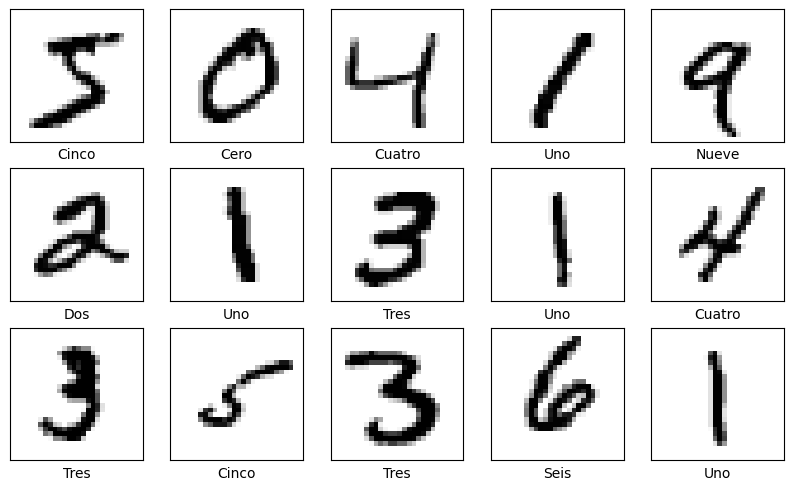

In [4]:
# Paso 3. Preprocesamiento de datos

class_names = ['Cero','Uno','Dos','Tres','Cuatro','Cinco','Seis','Siete','Ocho','Nueve']

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
# Paso 4. Selección y entrenamiento del modelo

# Selección
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [8]:
# Entrenamiento
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2596 - accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1103 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0180 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [9]:
# Evaluación de la exactitud

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0838 - accuracy: 0.9765 - 440ms/epoch - 1ms/step

Test accuracy: 0.9764999747276306


In [23]:
# Paso 5. Predicción / Prueba

predictions = model.predict(test_images)

predictions[0]

313/313 [==============================] - 0s 1ms/step


array([4.7613219e-10, 2.6634792e-09, 1.9836241e-08, 5.7624726e-05,
       6.3820422e-14, 1.7686170e-09, 1.9775395e-14, 9.9994153e-01,
       3.0310685e-09, 8.5288417e-07], dtype=float32)

In [24]:
np.argmax(predictions[0])

7

In [25]:
test_labels[0]

7

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

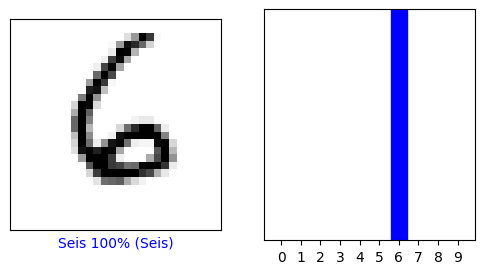

In [27]:
# Imagen 600 del lote de imagenes de prueba
i = 600
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

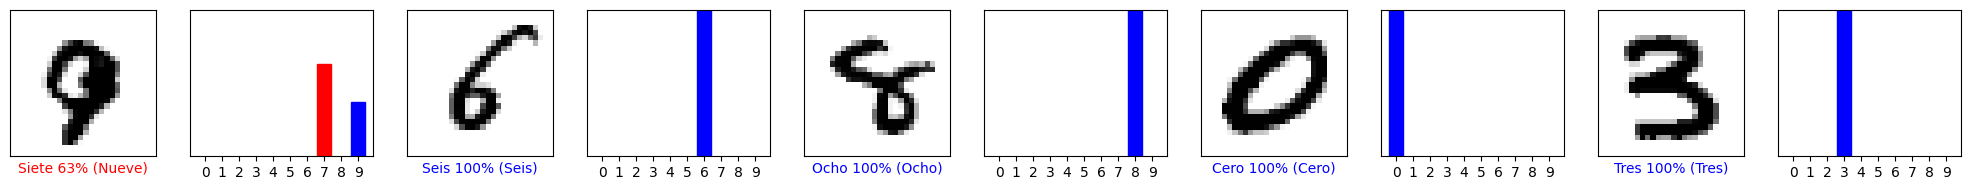

In [38]:
# Se seleccionan 5 imagenes al azar del lote de imagenes de prueba para hacer la predicción

import random

num_rows = 1
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Genera índices aleatorios para seleccionar imágenes al azar
random_indices = random.sample(range(len(test_images)), num_images)

for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(idx, predictions[idx], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(idx, predictions[idx], test_labels)

plt.tight_layout()
plt.show()